## Assignment 2 - Pre-Processing
Part 3a - Preprocessing dataset we found
The dataset we analyzed can be found at the following repository: https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

#### Hourly Weather Surface Brazil Southeast Region
 The following dataset contains records of variouse weather recorded patterns for the southeast region of Brazil indication attributes like the ones described below. 


## Content
### Data attributes and corresponding identification:

**<font color="blue">Code:</font>**

**<font color="blue">wsid</font>** Weather station id

**<font color="blue">wsnmName</font>** station (usually city location or nickname)

**<font color="blue">elvt</font>** Elevation

**<font color="blue">lat</font>** Latitude

**<font color="blue">lon</font>** Longitude

**<font color="blue">inmeStation</font>** number (INMET number) for the location

**<font color="blue">city</font>** City

**<font color="blue">provState</font>** (Province)

**<font color="blue">mdct</font>** Observation Datetime (complete date: date + time)

**<font color="blue">date</font>** Date of observation

**<font color="blue">yr</font>** The year (2000-2016)

**<font color="blue">mo</font>** The month (0-12)

**<font color="blue">da</font>** The day (0-31)

**<font color="blue">hr</font>** The hour (0-23)

**<font color="blue">prcpAmount</font>** of precipitation in millimetres (last hour)

**<font color="blue">stpAir</font>** pressure for the hour in hPa to tenths (instant)

**<font color="blue">smaxMaximum</font>** air pressure for the last hour in hPa to tenths

**<font color="blue">sminMinimum</font>** air pressure for the last hour in hPa to tenths


**<font color="blue">gbrdSolar</font>** radiation KJ/m2

**<font color="blue">tempAir</font>** temperature (instant) in celsius degrees

**<font color="blue">dewpDew</font>** point temperature (instant) in celsius degrees

**<font color="blue">tmaxMaximum</font>** temperature for the last hour in celsius degrees

**<font color="blue">dmaxMaximum</font>** dew point temperature for the last hour in celsius degrees

**<font color="blue">tminMinimum</font>** temperature for the last hour in celsius degrees

**<font color="blue">dminMinimum</font>** dew point temperature for the last hour in celsius degrees

**<font color="blue">hmdyRelative</font>** humid in % (instant)

**<font color="blue">hmaxMaximum</font>** relative humid temperature for the last hour in %

**<font color="blue">hminMinimum</font>** relative humid temperature for the last hour in %

**<font color="blue">wdspWind</font>** speed in metres per second

**<font color="blue">wdctWind</font>** direction in radius degrees (0-360)

**<font color="blue">gustWind</font>** gust in metres per second


In [147]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
pd.options.display.max_columns = None
# to make this notebook's output identical at every run
np.random.seed(0)

 # specify 'None' if want to read whole file
# sudeste.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows

nRowsRead = 100000 

df1 = pd.read_csv('sudeste.csv', nrows = nRowsRead)
df = pd.read_csv('sudeste.csv', header = None)
df1.dataframeName = 'sudeste.csv'
nRow, nCol = df1.shape

print(f'There are {nRow} rows and {nCol} columns')


import warnings
warnings.filterwarnings("ignore")

There are 100000 rows and 31 columns


In [148]:
#Orinal dataset shape
df1.shape

(100000, 31)

In [87]:
df1.head(10)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
5,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 05:00:00,2007-11-06,2007,11,6,5,NaN,983.7,983.8,983.6,NaN,23.8,16.2,25.4,16.4,23.8,16.0,62.0,62.0,57.0,2.0,99.0,6.8
6,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 06:00:00,2007-11-06,2007,11,6,6,NaN,983.7,983.7,983.6,NaN,22.0,16.7,23.8,16.7,22.0,16.2,72.0,72.0,62.0,1.3,93.0,4.9
7,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 07:00:00,2007-11-06,2007,11,6,7,NaN,984.6,984.6,983.7,NaN,19.7,17.4,22.0,17.8,19.5,16.6,86.0,89.0,72.0,0.5,157.0,2.8
8,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 08:00:00,2007-11-06,2007,11,6,8,NaN,985.7,985.7,984.6,NaN,18.3,17.3,19.7,17.3,18.3,16.9,93.0,94.0,85.0,NaN,141.0,1.5
9,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 09:00:00,2007-11-06,2007,11,6,9,NaN,986.7,986.7,985.7,214.149,22.9,18.3,22.9,18.3,18.2,17.1,75.0,94.0,75.0,NaN,248.0,NaN


### Raw Data##

In [88]:
print('Number of instances = %d' % (df1.shape[0]))
print('Number of attributes = %d' % (df1.shape[1]))

Number of instances = 100000
Number of attributes = 31


#### Follwing our the given attributes from our dataset alongisde its data type.
Float, Integer, and object our amougst the data types found

In [89]:
df1.dtypes

wsid      int64
wsnm     object
elvt    float64
lat     float64
lon     float64
inme     object
city     object
prov     object
mdct     object
date     object
yr        int64
mo        int64
da        int64
hr        int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtype: object

### Missing Values
It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data

In [90]:
import numpy as np

df1 = df1.replace('?',np.NaN)

print('Number of instances = %d' % (df1.shape[0]))
print('Number of attributes = %d' % (df1.shape[1]))

print('Number of missing values:')
for col in df1.columns:
    print('\t%s: %d' % (col,df1[col].isna().sum()))

Number of instances = 100000
Number of attributes = 31
Number of missing values:
	wsid: 0
	wsnm: 0
	elvt: 0
	lat: 0
	lon: 0
	inme: 0
	city: 0
	prov: 0
	mdct: 0
	date: 0
	yr: 0
	mo: 0
	da: 0
	hr: 0
	prcp: 85118
	stp: 0
	smax: 0
	smin: 0
	gbrd: 41973
	temp: 0
	dewp: 0
	tmax: 0
	dmax: 0
	tmin: 0
	dmin: 0
	hmdy: 0
	hmax: 0
	hmin: 0
	wdsp: 10133
	wdct: 0
	gust: 2506


### Dropping missing value and Replacing Values 

In [ ]:
print('Before replacing missing values:')
print(df1['prcp'])

In [92]:

#print(df['reviews_per_month'])
df1['prcp'] = df1.fillna(df1.median())

print('\nAfter replacing missing values:')
print(df1['prcp'])


After replacing missing values:
0        178
1        178
2        178
3        178
4        178
        ... 
99995    303
99996    303
99997    303
99998    303
99999    303
Name: prcp, Length: 100000, dtype: object


In [93]:
print('Before replacing missing values:')
print(df1['gbrd'])
df1['gbrd'] = df1.fillna(df1.median())

print('\nAfter replacing missing values:')
print(df1['gbrd'])

Before replacing missing values:
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
99995    341.404
99996    433.882
99997    804.016
99998    653.214
99999    976.912
Name: gbrd, Length: 100000, dtype: float64

After replacing missing values:
0        178
1        178
2        178
3        178
4        178
        ... 
99995    303
99996    303
99997    303
99998    303
99999    303
Name: gbrd, Length: 100000, dtype: object


In [94]:
df1.shape

(100000, 31)

#### Our finding based upon replacing and removing NAN values

In [95]:
print('Number of rows in original data = %d' % (df1.shape[0]))
df1.dropna()
df2 = df1.dropna()
print('Number of rows after discarding missing values = %d' % (df2.shape[0]))

Number of rows in original data = 100000
Number of rows after discarding missing values = 89867


### Outliers##

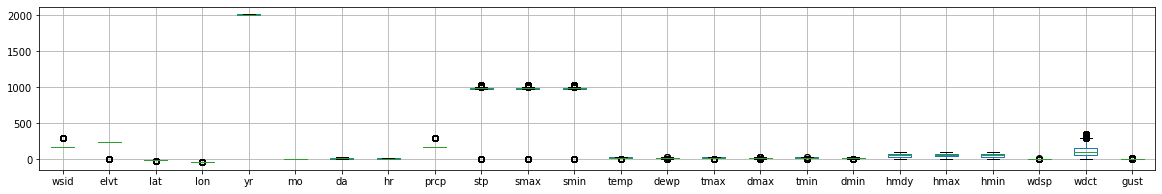

In [96]:
%matplotlib inline

df2=df2.drop(['wsnm','city','prov','mdct','inme','date'],axis=1)
df2['prcp'] = pd.to_numeric(df2['prcp'])
df2.boxplot(figsize=(20,3))

In [97]:
df2.shape

(89867, 25)

### Temperature Column Outlier Box Plot

0 -5 demonstrate these are our temperature outliers.

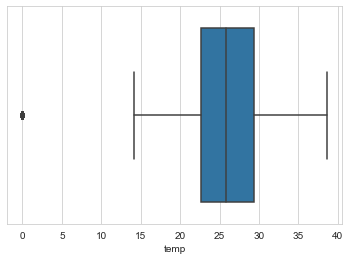

In [141]:
import seaborn as sns

sns.boxplot(x = df2['temp'])

### Wind Gust Outlier Box
 The white dots between 15 - 20 our outliers.

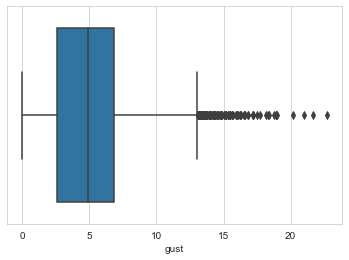

In [142]:
import seaborn as sns

sns.boxplot(x = df2['gust'])


### A vertical box plot groupbed by month and tempertaure in celius

Across the month 1 - 12 we can see temeperature values 0 - up to 15 temperature values are our outliers.

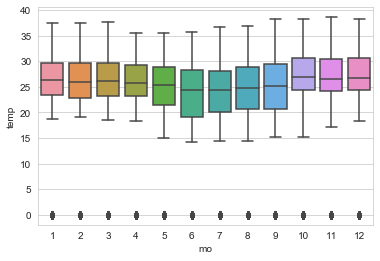

In [135]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'mo', y = 'temp', data = df2) 

### Standardization##

In [98]:
Z = (df2-df2.mean())/df2.std()
Z[22:25]

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
24,-0.568528,0.568528,0.568528,0.568528,-1.280057,1.266007,-0.99253,-1.693283,-0.568528,0.344792,0.345577,0.344802,-0.568528,0.677220,-0.135234,0.679135,-0.200470,0.774883,-0.296604,-0.527497,-0.629696,-0.618447,2.011313,-0.135417,1.341925
25,-0.568528,0.568528,0.568528,0.568528,-1.280057,1.266007,-0.99253,-1.545999,-0.568528,0.346635,0.347414,0.347252,-0.568528,0.583839,-0.416590,0.608530,-0.200470,0.678806,-0.341694,-0.635144,-0.594770,-0.581748,2.987099,-0.135417,2.351133
26,-0.568528,0.568528,0.568528,0.568528,-1.280057,1.266007,-0.99253,-1.398715,-0.568528,0.346942,0.348026,0.349089,-0.568528,0.459330,-0.283316,0.507665,-0.359379,0.550702,-0.341694,-0.455732,-0.559844,-0.545049,3.556308,-0.012551,2.385934


In [99]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 89867
Number of rows after discarding missing values = 0


### Duplicates##

In [100]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2.loc[[10,28]]

Number of duplicate rows = 0


,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
10,178,237.0,-6.835777,-38.311583,2007,11,6,10,178,987.2,987.2,986.7,178,25.0,17.1,25.1,18.4,22.9,17.0,61.0,76.0,61.0,3.3,97.0,6.2
28,178,237.0,-6.835777,-38.311583,2007,11,7,4,178,985.8,985.8,985.3,178,25.1,16.4,26.6,16.4,25.1,15.5,58.0,58.0,51.0,3.1,100.0,9.8


In [101]:
print('Number of rows before discarding duplicates = %d' % (df2.shape[0]))
df2 = df2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df2.shape[0]))

Number of rows before discarding duplicates = 89867
Number of rows after discarding duplicates = 89867


### Sorting Dataframe


In [102]:
df2 = df2.sort_values(by='yr',ascending=True)
df2.head(10)

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
78746,303,9.0,-20.271094,-40.306069,2006,11,29,2,303,1009.7,1010.3,1009.7,303,26.2,21.8,26.4,21.9,26.1,21.5,77.0,77.0,75.0,3.3,6.0,8.4
78538,303,9.0,-20.271094,-40.306069,2006,11,20,10,303,1012.9,1012.9,1012.4,303,26.6,20.9,26.6,21.7,24.6,20.9,71.0,82.0,71.0,2.0,340.0,5.8
78539,303,9.0,-20.271094,-40.306069,2006,11,20,11,303,1013.3,1013.3,1012.9,303,27.3,20.2,27.9,21.4,26.5,19.8,65.0,72.0,63.0,3.7,319.0,8.4
78540,303,9.0,-20.271094,-40.306069,2006,11,20,12,303,1013.4,1013.5,1013.3,303,29.2,20.5,29.5,20.9,27.3,19.8,59.0,66.0,56.0,2.6,309.0,8.4
78541,303,9.0,-20.271094,-40.306069,2006,11,20,13,303,1012.9,1013.4,1012.9,303,29.9,21.3,30.4,21.6,29.0,19.9,60.0,62.0,54.0,1.7,320.0,5.5
78542,303,9.0,-20.271094,-40.306069,2006,11,20,14,303,1012.2,1012.9,1012.2,303,30.1,20.2,31.4,21.6,29.5,19.9,55.0,62.0,51.0,3.2,11.0,6.5
78543,303,9.0,-20.271094,-40.306069,2006,11,20,15,303,1011.5,1012.2,1011.5,303,30.3,21.1,30.9,21.7,30.0,20.2,58.0,59.0,55.0,3.1,3.0,7.7
78544,303,9.0,-20.271094,-40.306069,2006,11,20,16,303,1010.7,1011.5,1010.7,303,31.2,21.0,31.6,21.8,30.3,20.6,55.0,59.0,54.0,3.4,10.0,8.2
78545,303,9.0,-20.271094,-40.306069,2006,11,20,17,303,1009.9,1010.7,1009.9,303,31.7,21.9,32.7,22.3,31.0,20.5,56.0,57.0,50.0,3.2,25.0,7.4
78546,303,9.0,-20.271094,-40.306069,2006,11,20,18,303,1009.4,1009.9,1009.4,303,29.8,21.9,32.0,22.6,29.8,21.6,63.0,64.0,55.0,3.7,38.0,8.5


#### Describing the overall dataset mean, standard deviation etc.

In [103]:
df2.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.000000,89867.00000,89867.000000,89867.000000,89867.000000
mean,208.534011,181.305963,-10.117650,-38.798780,2010.697041,6.565758,15.722245,11.496712,208.534011,872.466156,871.806869,871.322211,23.673026,15.913238,24.266872,16.487683,22.941349,15.373411,54.700658,58.029455,51.85197,1.726533,121.123638,4.743928
std,53.707147,97.961837,5.772580,0.856945,2.888186,3.502542,8.787887,6.789597,53.707147,325.511911,326.679957,326.500248,9.637888,6.753011,9.914271,6.922162,9.367412,6.653357,27.868718,28.631998,27.24886,1.229778,89.528135,2.873538
min,178.000000,9.000000,-20.271094,-40.306069,2006.000000,1.000000,1.000000,0.000000,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,178.000000,237.000000,-6.835777,-38.311583,2008.000000,3.000000,8.000000,6.000000,178.000000,983.400000,983.800000,983.100000,22.700000,14.400000,23.300000,15.300000,22.200000,13.700000,38.000000,42.000000,34.00000,0.700000,64.000000,2.600000
50%,178.000000,237.000000,-6.835777,-38.311583,2010.000000,7.000000,16.000000,12.000000,178.000000,986.200000,986.500000,985.900000,25.800000,17.900000,26.500000,18.500000,25.100000,17.300000,59.000000,64.000000,56.00000,1.600000,109.000000,4.900000
75%,178.000000,237.000000,-6.835777,-38.311583,2013.000000,10.000000,23.000000,17.000000,178.000000,990.800000,991.100000,990.600000,29.400000,20.500000,30.300000,21.100000,28.400000,20.000000,76.000000,81.000000,72.00000,2.600000,157.000000,6.800000
max,303.000000,237.000000,-6.835777,-38.311583,2016.000000,12.000000,31.000000,23.000000,303.000000,1027.500000,1027.700000,1027.400000,38.600000,30.900000,39.300000,30.900000,38.000000,29.100000,100.000000,100.000000,100.00000,19.100000,360.000000,22.700000


### Sort by weather station ID

In [104]:
df2 = df2.sort_values(by='wsid',ascending=True)
df2.head(10)

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
26839,178,237.0,-6.835777,-38.311583,2010,11,28,7,178,982.7,982.7,982.2,178,25.5,18.6,26.0,19.5,25.0,18.6,66.0,72.0,64.0,3.4,93.0,6.8
42374,178,237.0,-6.835777,-38.311583,2012,9,5,14,178,991.7,992.9,991.7,178,30.3,9.6,31.0,11.1,28.6,9.2,28.0,34.0,27.0,3.3,125.0,9.1
42373,178,237.0,-6.835777,-38.311583,2012,9,5,13,178,992.9,993.2,992.8,178,28.7,11.0,28.9,13.7,26.3,10.5,33.0,44.0,32.0,4.1,142.0,9.6
42372,178,237.0,-6.835777,-38.311583,2012,9,5,12,178,993.2,993.2,992.7,178,26.5,12.8,27.0,14.1,25.2,12.8,43.0,50.0,42.0,4.1,158.0,10.3
42371,178,237.0,-6.835777,-38.311583,2012,9,5,11,178,992.7,992.8,992.3,178,25.2,13.8,25.3,15.8,23.3,13.8,49.0,61.0,49.0,3.5,153.0,9.5
42370,178,237.0,-6.835777,-38.311583,2012,9,5,10,178,992.4,992.4,991.4,178,23.5,15.4,24.0,15.6,22.8,15.2,60.0,63.0,58.0,3.7,169.0,8.3
42369,178,237.0,-6.835777,-38.311583,2012,9,5,9,178,991.4,991.4,990.9,178,22.9,15.1,23.1,15.2,22.6,14.9,62.0,62.0,61.0,2.2,142.0,6.7
42368,178,237.0,-6.835777,-38.311583,2012,9,5,8,178,990.9,990.9,990.6,178,22.7,14.9,23.6,14.9,22.7,14.8,61.0,61.0,58.0,1.9,137.0,7.6
42367,178,237.0,-6.835777,-38.311583,2012,9,5,7,178,990.7,990.9,990.6,178,23.6,14.9,24.1,15.7,23.5,14.9,58.0,61.0,58.0,3.1,144.0,8.5
42366,178,237.0,-6.835777,-38.311583,2012,9,5,6,178,990.9,990.9,990.7,178,23.8,15.7,23.9,15.8,23.2,15.6,61.0,62.0,60.0,1.6,137.0,4.7


### Z-score

In [108]:
from scipy.stats import zscore

df2['temp_zscore'] = zscore(df2['temp'])
df2.head()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,temp_zscore
26839,178,237.0,-6.835777,-38.311583,2010,11,28,7,178,982.7,982.7,982.2,178,25.5,18.6,26.0,19.5,25.0,18.6,66.0,72.0,64.0,3.4,93.0,6.8,0.189563
42374,178,237.0,-6.835777,-38.311583,2012,9,5,14,178,991.7,992.9,991.7,178,30.3,9.6,31.0,11.1,28.6,9.2,28.0,34.0,27.0,3.3,125.0,9.1,0.687600
42373,178,237.0,-6.835777,-38.311583,2012,9,5,13,178,992.9,993.2,992.8,178,28.7,11.0,28.9,13.7,26.3,10.5,33.0,44.0,32.0,4.1,142.0,9.6,0.521588
42372,178,237.0,-6.835777,-38.311583,2012,9,5,12,178,993.2,993.2,992.7,178,26.5,12.8,27.0,14.1,25.2,12.8,43.0,50.0,42.0,4.1,158.0,10.3,0.293320
42371,178,237.0,-6.835777,-38.311583,2012,9,5,11,178,992.7,992.8,992.3,178,25.2,13.8,25.3,15.8,23.3,13.8,49.0,61.0,49.0,3.5,153.0,9.5,0.158435


### After Z-Score applied.

In [145]:

print(df2['temp'].to_csv(index=False))

25.5
30.3
28.7
26.5
25.2
23.5
22.9
22.7
23.6
23.8
23.9
24.6
25.8
27.3
28.6
29.1
21.5
23.9
32.7
26.1
22.9
24.5
26.4
26.6
28.3
29.2
29.9
31.2
31.3
32.3
32.2
32.9
33.2
32.6
32.0
30.4
28.9
27.0
25.0
23.7
33.6
33.6
34.1
34.2
23.4
24.3
24.8
25.8
26.9
28.2
29.3
24.4
22.3
29.3
32.9
26.5
27.9
29.4
27.8
24.1
20.9
22.5
31.8
25.6
20.6
19.4
32.9
32.1
30.7
29.4
31.6
33.1
30.7
33.2
17.5
32.5
32.5
32.1
30.4
29.4
27.8
26.7
24.4
23.4
33.2
25.0
24.6
24.0
29.5
28.0
26.0
24.8
22.1
22.1
22.3
22.5
27.5
24.3
26.7
27.8
27.0
25.3
23.4
24.0
27.1
32.6
25.1
35.1
31.7
20.6
24.1
31.4
34.9
35.4
35.4
34.5
33.9
31.4
25.0
29.7
25.6
23.8
18.6
19.9
24.8
24.9
26.5
26.7
27.6
23.6
35.7
34.1
27.3
27.0
25.3
22.8
17.1
19.8
23.8
23.4
29.9
25.5
25.2
24.1
23.5
22.5
21.4
25.0
22.8
23.5
27.0
35.0
34.9
32.9
32.6
30.8
29.1
32.1
34.7
35.3
32.0
25.2
30.4
25.9
28.0
28.9
27.6
22.3
24.8
31.1
32.4
33.0
26.8
22.0
21.0
24.2
23.2
25.5
26.0
26.1
27.1
23.8
23.6
25.6
23.9
29.1
30.2
31.5
28.0
30.0
28.9
28.0
26.9
25.6
29.7
25.3
31.4
25.5
30.8
29.7


In [109]:
df2['prcp_zscore'] = zscore(df2['prcp'])
df2.head()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,temp_zscore,prcp_zscore
26839,178,237.0,-6.835777,-38.311583,2010,11,28,7,178,982.7,982.7,982.2,178,25.5,18.6,26.0,19.5,25.0,18.6,66.0,72.0,64.0,3.4,93.0,6.8,0.189563,-0.568531
42374,178,237.0,-6.835777,-38.311583,2012,9,5,14,178,991.7,992.9,991.7,178,30.3,9.6,31.0,11.1,28.6,9.2,28.0,34.0,27.0,3.3,125.0,9.1,0.687600,-0.568531
42373,178,237.0,-6.835777,-38.311583,2012,9,5,13,178,992.9,993.2,992.8,178,28.7,11.0,28.9,13.7,26.3,10.5,33.0,44.0,32.0,4.1,142.0,9.6,0.521588,-0.568531
42372,178,237.0,-6.835777,-38.311583,2012,9,5,12,178,993.2,993.2,992.7,178,26.5,12.8,27.0,14.1,25.2,12.8,43.0,50.0,42.0,4.1,158.0,10.3,0.293320,-0.568531
42371,178,237.0,-6.835777,-38.311583,2012,9,5,11,178,992.7,992.8,992.3,178,25.2,13.8,25.3,15.8,23.3,13.8,49.0,61.0,49.0,3.5,153.0,9.5,0.158435,-0.568531


## Correlation amougst selected columns

In [110]:
corr_matrix = df2.loc[:, ['temp'] + ['lat'] + ['lon'] +['prcp'] +['hmdy']+['gbrd']+['wdsp'] ].corr(method='pearson')
corr_matrix['temp'].sort_values(ascending=False)
corr_matrix

,temp,lat,lon,prcp,hmdy,wdsp
temp,1.000000,-0.031518,-0.031518,0.031518,0.440075,0.597554
lat,-0.031518,1.000000,1.000000,-1.000000,-0.446497,-0.132491
lon,-0.031518,1.000000,1.000000,-1.000000,-0.446497,-0.132491
prcp,0.031518,-1.000000,-1.000000,1.000000,0.446497,0.132491
hmdy,0.440075,-0.446497,-0.446497,0.446497,1.000000,0.156687
wdsp,0.597554,-0.132491,-0.132491,0.132491,0.156687,1.000000


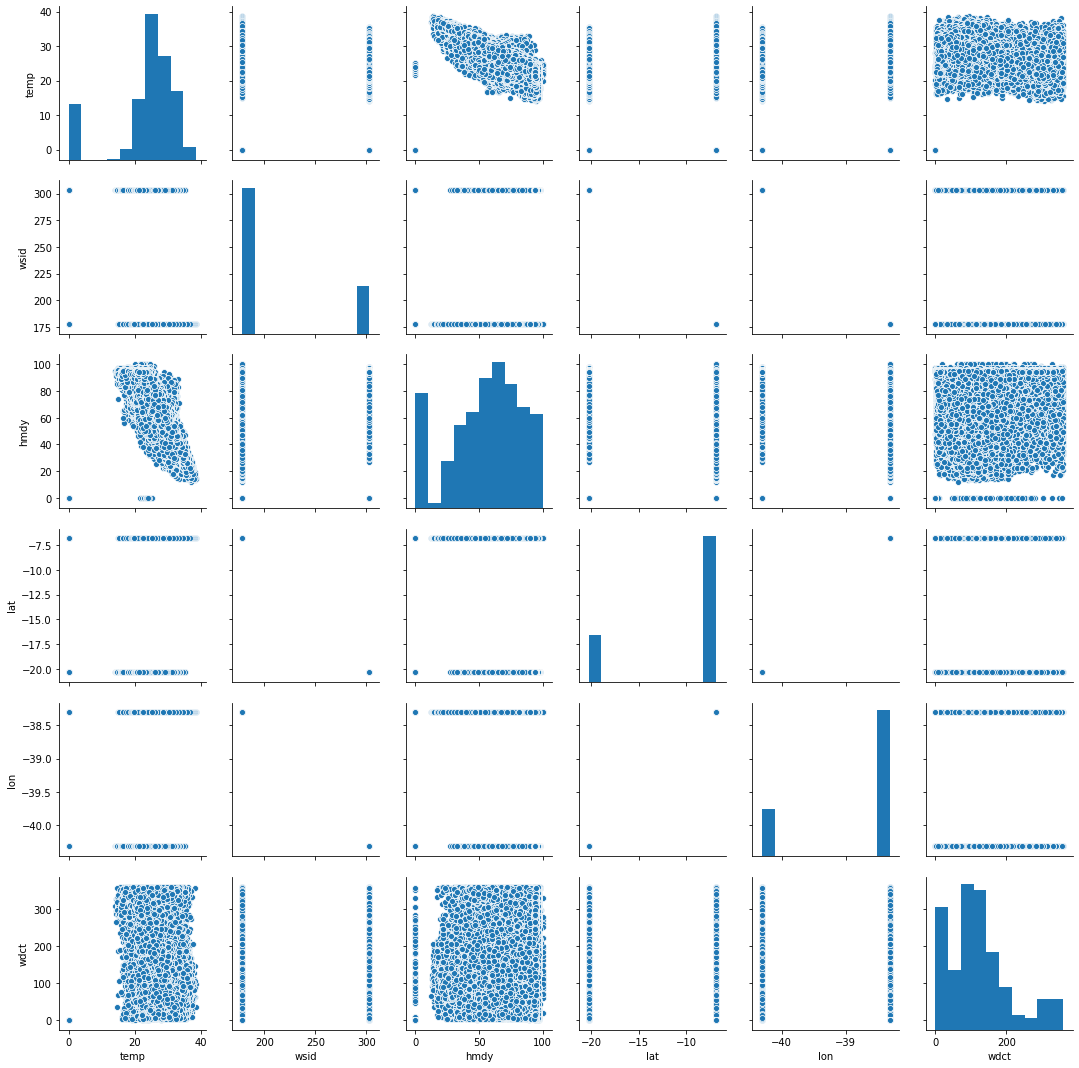

In [111]:
sns.pairplot(data=df2.loc[:, ['temp'] + ['wsid'] + ['hmdy'] + ['lat'] + ['lon'] + ['wdct']])
plt.show()

### Train-test split

In [112]:
X=df2[['prcp','hmdy', 'wdct', 'gbrd', 'wdsp']]
y=df2['temp']

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_tr.shape)
print(x_te.shape)

(62906, 5)
(26961, 5)


### Mean and std for dependent variables

In [113]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_tr)
x_train_std = std_scale.transform(x_tr)

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [114]:
print("Standrad deviation for both Train and test sets")
x_train_std


Standrad deviation for both Train and test sets


array([[-0.5716353 ,  0.44144855, -0.20026475, -0.5716353 ,  0.06293011],
       [-0.5716353 , -0.63252333, -0.11115841, -0.5716353 ,  0.22535088],
       [ 1.74936711, -0.13133645, -0.95766862,  1.74936711,  2.98650404],
       ...,
       [ 1.74936711,  0.51304668, -0.87970057,  1.74936711,  1.60592746],
       [-0.5716353 , -0.88311677,  0.26754353, -0.5716353 ,  1.84955862],
       [-0.5716353 , -1.95708865, -1.34750885, -0.5716353 , -1.39885685]])

In [115]:
print("mean of train data")
st_train=std_scale.mean_ 
print(st_train)

mean of train data
[208.78601405  54.66871205 120.97984294 208.78601405   1.72250978]


In [116]:
print("mean of test data")
x_test_std = std_scale.transform(x_te)

st_test=std_scale.mean_ 
print(st_test)

mean of test data
[208.78601405  54.66871205 120.97984294 208.78601405   1.72250978]


### Plot  Graph for mean_test_data our Test dataset

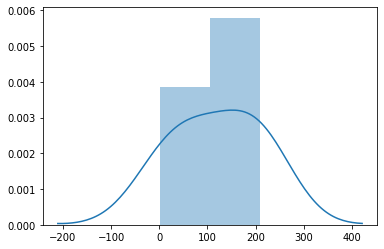

In [117]:
sns.distplot(st_test)

### Mean and std for Target variables 

In [118]:
from scipy.stats import zscore

y_tr_mean = zscore(y_tr)
y_tr_mean

array([ 0.11993531,  0.56459841,  0.38880137, ...,  0.18198132,
        0.85414648, -2.44463328])

In [119]:
from scipy.stats import zscore

y_te_mean = zscore(y_te)
y_te_mean

array([ 0.69554759,  0.66417127, -0.09931894, ...,  0.08893892,
        0.86288791, -0.20390664])

### Plot for mean_target_Variable

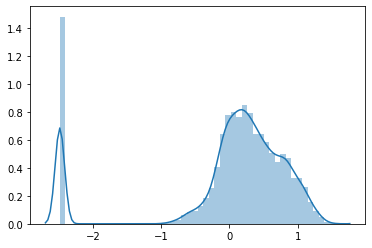

In [120]:
sns.distplot(y_te_mean)

### Aggregation

Daily Precipitaition values across dates given. 

Text(0.5, 1.0, 'Daily Precipitation (variance = 84.3971)')

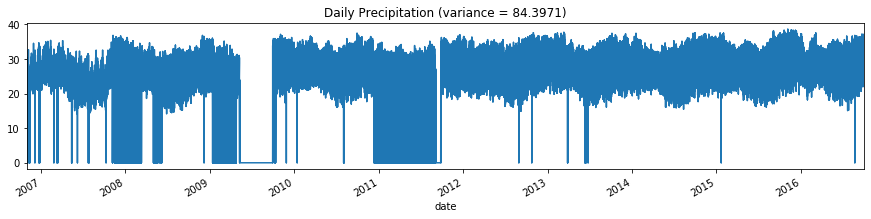

In [121]:
daily = df1.copy()
daily.index = pd.to_datetime(daily['date'])
daily = daily['temp']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

In [122]:
daily

date
2007-11-06    29.3
2007-11-06    29.0
2007-11-06    27.4
2007-11-06    25.8
2007-11-06    25.4
              ... 
2009-05-02    20.6
2009-05-02    21.1
2009-05-02    21.0
2009-05-02    21.3
2009-05-02    22.3
Name: temp, Length: 100000, dtype: float64

### Monthly Precipitation Values plot 

Text(0.5, 1.0, 'Monthly Precipitation (variance = 54793595.9181)')

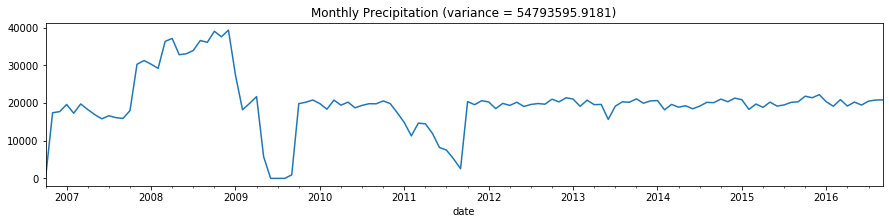

In [123]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

### Annual Precipiation Levels Graph

Text(0.5, 1.0, 'Annual Precipitation (variance = 8681547300.0168)')

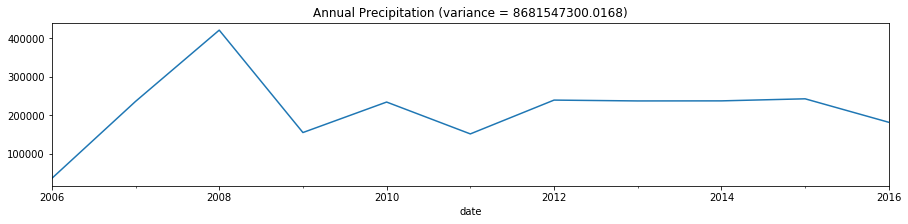

In [124]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.


In [125]:
df1.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,178,982.5,982.5,981.3,178,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,178,983.2,983.2,982.5,178,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,178,983.5,983.5,983.2,178,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,178,983.7,983.7,983.4,178,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,178,983.7,983.8,983.6,178,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


### Sampling a random sample form our orignal dataset for a range of 3 

In [126]:
sample = df1.sample(n=3)
sample

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
3582,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2008-04-03 06:00:00,2008-04-03,2008,4,3,6,178,982.3,982.3,982.2,178,23.1,22.2,24.0,23.0,23.1,22.2,95.0,95.0,93.0,1.7,39.0,3.9
60498,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2014-09-30 18:00:00,2014-09-30,2014,9,30,18,178,983.0,983.8,983.0,178,37.6,9.0,37.8,9.9,36.0,8.9,18.0,20.0,18.0,1.4,205.0,5.0
53227,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2013-12-01 19:00:00,2013-12-01,2013,12,1,19,178,980.3,980.6,980.3,178,35.1,10.2,37.0,11.4,35.1,9.8,22.0,23.0,20.0,3.2,125.0,6.4


### Sampling for 1% of orignal dataset without replacment 

In [127]:
sample = df1.sample(frac=0.01, random_state=1)
sample

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
43660,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2012-10-29 04:00:00,2012-10-29,2012,10,29,4,178,985.8,986.0,985.7,178,25.6,19.5,26.7,19.5,25.6,19.1,69.0,69.0,63.0,1.6,63.0,6.0
87278,303,VITÓRIA,9.0,-20.271094,-40.306069,A612,Vitória,ES,2007-11-19 14:00:00,2007-11-19,2007,11,19,14,303,1013.4,1014.3,1013.4,303,29.6,18.6,30.3,19.2,28.5,17.6,52.0,56.0,47.0,3.6,9.0,7.7
14317,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2009-06-24 13:00:00,2009-06-24,2009,6,24,13,178,0.0,0.0,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81932,303,VITÓRIA,9.0,-20.271094,-40.306069,A612,Vitória,ES,2007-04-10 20:00:00,2007-04-10,2007,4,10,20,303,1013.8,1014.7,1013.4,303,22.6,21.7,23.1,22.1,22.5,21.5,94.0,95.0,94.0,2.2,11.0,6.0
95321,303,VITÓRIA,9.0,-20.271094,-40.306069,A612,Vitória,ES,2008-10-19 17:00:00,2008-10-19,2008,10,19,17,303,1015.9,1016.1,1015.6,303,24.6,20.7,26.7,20.9,24.6,20.0,79.0,80.0,67.0,4.0,172.0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29559,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2011-03-21 15:00:00,2011-03-21,2011,3,21,15,178,982.8,983.7,982.8,178,30.5,19.4,30.9,20.8,29.6,17.8,52.0,59.0,44.0,1.8,167.0,5.3
96320,303,VITÓRIA,9.0,-20.271094,-40.306069,A612,Vitória,ES,2008-11-30 08:00:00,2008-11-30,2008,11,30,8,303,1011.3,1011.3,1011.2,303,21.8,20.9,21.8,21.0,21.7,20.9,95.0,95.0,95.0,0.6,157.0,3.3
38431,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2012-03-25 07:00:00,2012-03-25,2012,3,25,7,178,984.9,985.0,984.8,178,24.0,22.7,24.1,22.9,23.7,22.5,93.0,94.0,93.0,NaN,119.0,1.3
48756,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2013-05-29 12:00:00,2013-05-29,2013,5,29,12,178,987.4,987.5,987.4,178,27.6,19.2,28.1,20.2,26.2,19.2,60.0,68.0,60.0,2.0,108.0,6.5


# Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

237.0    78048
9.0      21952
Name: elvt, dtype: int64

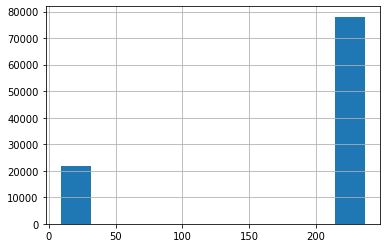

In [128]:
df1['elvt'].hist(bins=10)
df1['elvt'].value_counts(sort=False)

In [129]:
bins = pd.cut(df1['elvt'],4)
bins.value_counts(sort=False)

(8.772, 66.0]     21952
(66.0, 123.0]         0
(123.0, 180.0]        0
(180.0, 237.0]    78048
Name: elvt, dtype: int64